In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 0, ''), Text(0, 0.5, '')]

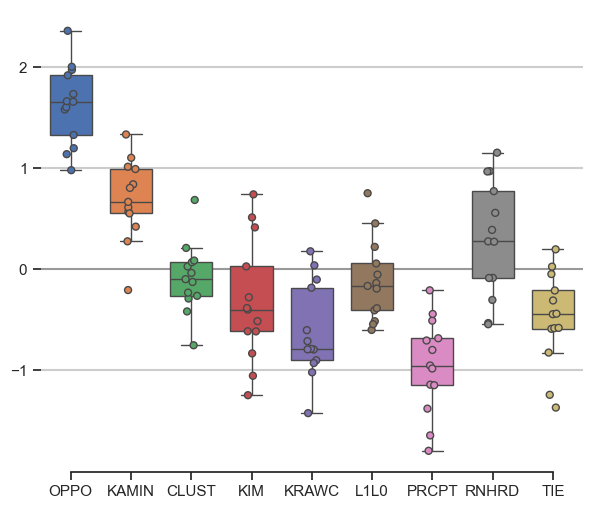

In [3]:
fid_norm = pd.read_csv("fid_norm.csv",sep=";")
fid_norm = fid_norm.set_index('fid_norm').T
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(fid_norm, saturation=1, fill=True, width=0.70, showfliers = False, zorder=10)
sns.stripplot(fid_norm, zorder=12, linewidth=1)
ax.axhline(2, color=".8")
ax.axhline(1, color=".8")
ax.axhline(0, color=".6")
ax.axhline(-1, color=".8")
sns.despine(trim=True, left=True)
ax.set_yticks(ax.get_yticks()[1::])
ax.set(xlabel=None,ylabel=None)

[Text(0.5, 0, ''), Text(0, 0.5, '')]

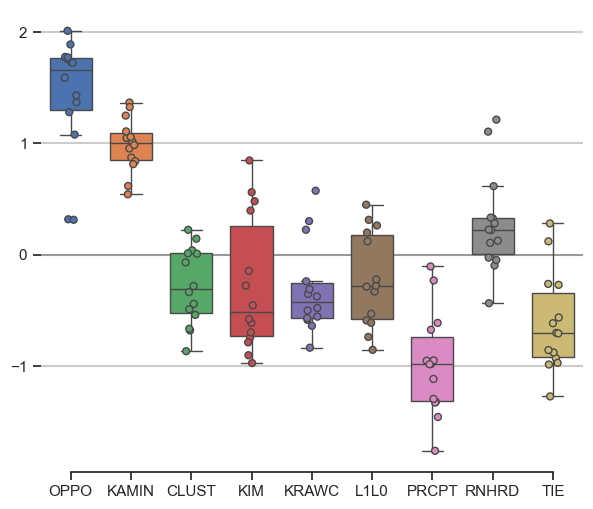

In [4]:
est_norm = pd.read_csv("est_norm.csv",sep=";")
est_norm = est_norm.set_index('est_norm').T
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(est_norm, saturation=1, fill=True, width=0.70, showfliers = False, zorder=10)
sns.stripplot(est_norm, zorder=12, linewidth=1)
ax.axhline(2, color=".8")
ax.axhline(1, color=".8")
ax.axhline(0, color=".6")
ax.axhline(-1, color=".8")
sns.despine(trim=True, left=True)
ax.set_yticks(ax.get_yticks()[1::2])
ax.set(xlabel=None,ylabel=None)

OPPO y = x * 1.15 + -2.5    r^2: 0.88
KAMIN y = x * 0.99 + -2.78    r^2: 0.792
CLUST y = x * 1.01 + -2.29    r^2: 0.89
KIM y = x * 0.97 + -0.72    r^2: 0.905
KRAWC y = x * 0.72 + -1.52    r^2: 0.807
L1L0 y = x * 1.2 + -2.39    r^2: 0.933
PRCPT y = x * 1.03 + -3.0    r^2: 0.741
RNHRD y = x * 0.84 + -1.83    r^2: 0.797
TIE y = x * 0.99 + -2.71    r^2: 0.788


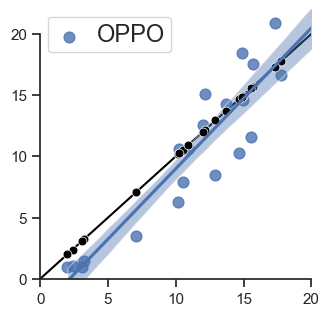

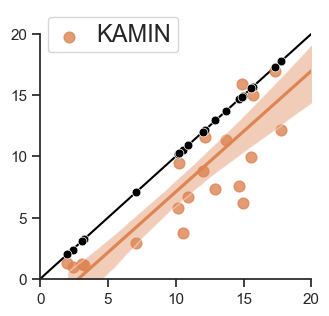

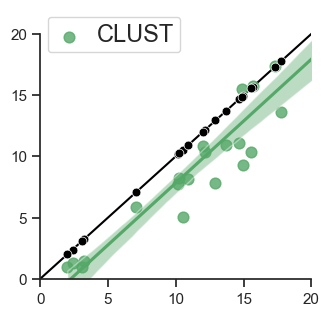

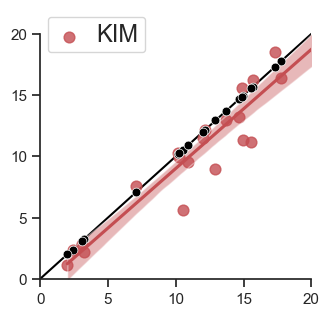

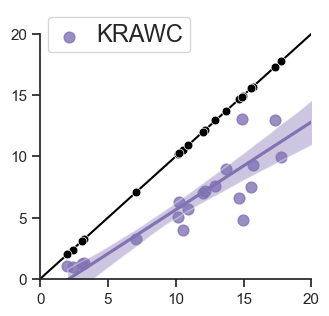

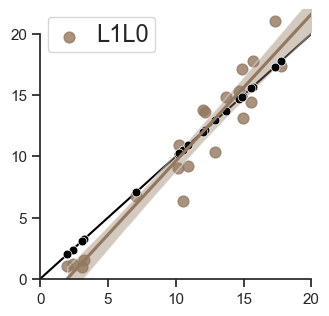

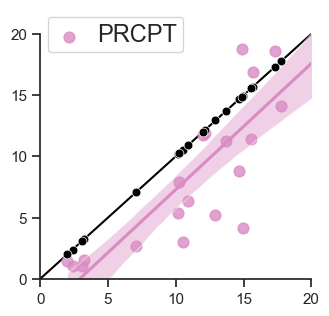

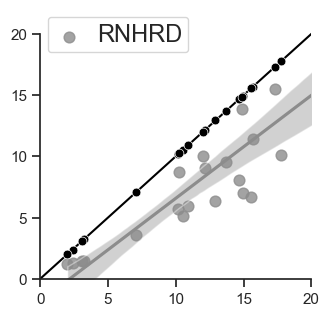

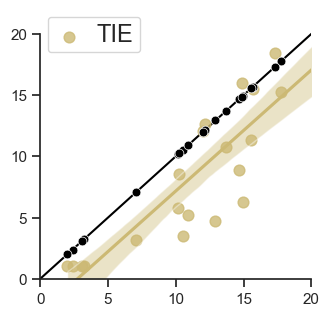

In [5]:
gray_match = pd.read_csv("gray_match.csv",sep=";",header=None)
gray_match = gray_match.T
gray_match.columns = gray_match.iloc[0]
gray_match = gray_match[1:]
sns.set_theme(style="ticks")
slopes = []
for i in range(9):
    TMO_name = list(gray_match.columns)[i+1]
    x = gray_match['Ground_Truth']
    y = gray_match[TMO_name]
    f, ax = plt.subplots(figsize=(3.5, 3.5))
    ax.set(ylim=(0, 22),xlim=(0,20))
    ax = sns.regplot(data=gray_match, x=x.astype('float'), y=y.astype('float'), color=sns.color_palette("deep")[i], scatter_kws={'s':60})
    plt.setp(ax.collections[1], alpha=0.4)
    sns.scatterplot(data=gray_match, x=x.astype('float'), y=x.astype('float'), color="black", s=40)
    ax.legend(labels=[TMO_name],loc='upper left')
    plt.setp(ax.get_legend().get_texts(), fontsize='17')
    ax.set_yticks([0,5,10,15,20])
    sns.lineplot(x=[0,24],y=[0,24],color='black',zorder=-1)
    ax.set(xlabel=None,ylabel=None)
    sns.despine(trim=True)
    x = np.array(x).astype('float')
    y = np.array(y).astype('float')
    A = np.vstack([x, np.ones(len(x))]).T
    model, resid = np.linalg.lstsq(A, y, rcond=None)[:2]
    m, b = model
    r2 = 1 - resid / (y.size * y.var())
    print(TMO_name,"y = x *",round(m,2),"+",round(b,2),"   r^2:",round(r2[0],3))
    slopes.append(round(np.abs(1-m),3))



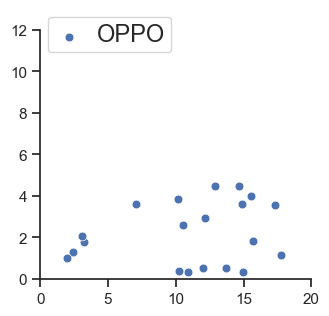

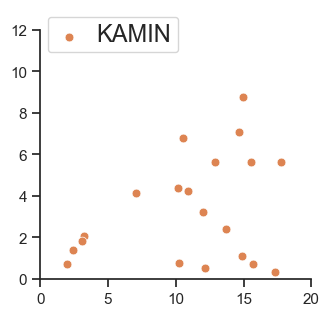

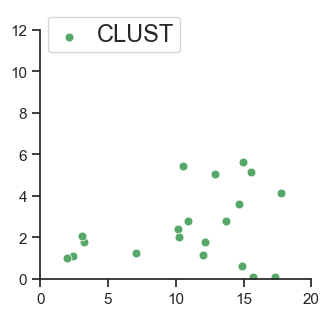

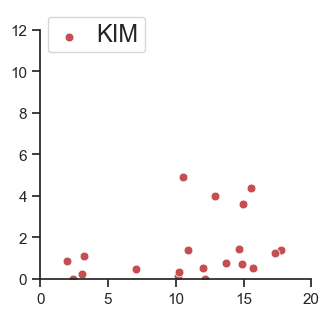

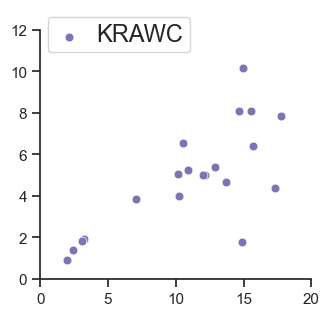

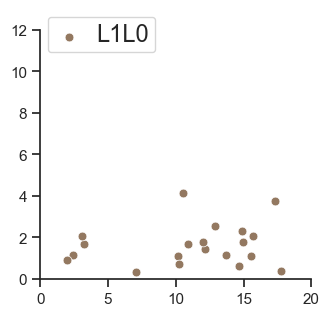

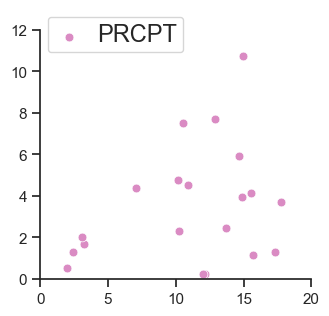

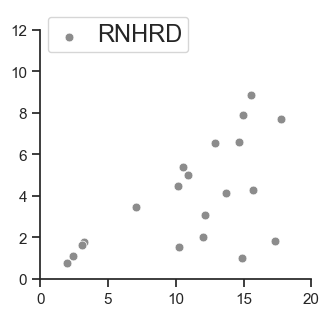

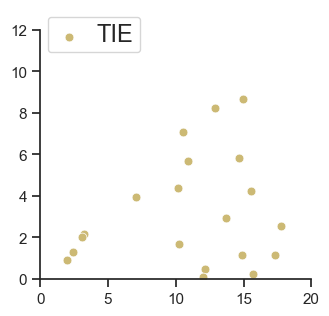

In [130]:
gray_match = pd.read_csv("gray_match.csv",sep=";",header=None)
gray_match = gray_match.T
gray_match.columns = gray_match.iloc[0]
gray_match = gray_match[1:]
sns.set_theme(style="ticks")
for i in range(9):
    TMO_name = list(gray_match.columns)[i+1]
    x = gray_match['Ground_Truth']
    y = gray_match[TMO_name]
    f, ax = plt.subplots(figsize=(3.5, 3.5))
    ax.set(ylim=(0, 13),xlim=(0,20))
    sns.scatterplot(data=gray_match, x=x.astype('float'), y=np.abs(y.astype('float')-x.astype('float')), color=sns.color_palette("deep")[i], s=40)
    ax.legend(labels=[TMO_name],loc='upper left')
    plt.setp(ax.get_legend().get_texts(), fontsize='17')
    # ax.set_yticks([0,5,10,15,20])
    ax.set(xlabel=None,ylabel=None)
    sns.despine(trim=True)
    x = np.array(x).astype('float')
    y = np.array(y).astype('float')
    A = np.vstack([x, np.ones(len(x))]).T



In [6]:
from scipy import stats

gray_match = pd.read_csv("gray_match.csv",sep=";",header=None)
gray_match = gray_match.T
gray_match.columns = gray_match.iloc[0]
gray_match = gray_match[1:]
pvalues = []
rmses = []
for i in range(9):
    TMO_name = list(gray_match.columns)[i+1]
    x = gray_match['Ground_Truth'].astype('float')
    y = gray_match[TMO_name].astype('float')
    ttest = stats.ttest_ind(a=x, b=y, random_state=44)
    pvalues.append(round(ttest.pvalue,3))
    rmse = np.sqrt(np.mean((y-x)**2))
    print("pvalue:",round(ttest.pvalue,5),"  rmse:",round(rmse,2))
    rmses.append(round(rmse,3))
graymatch = pd.DataFrame({"SlopeDiff":slopes,"RMSE":rmses,"T-Test PV":pvalues})
graymatch

pvalue: 0.7259   rmse: 2.6
pvalue: 0.10783   rmse: 4.07
pvalue: 0.22528   rmse: 2.93
pvalue: 0.54144   rmse: 2.06
pvalue: 0.00201   rmse: 5.61
pvalue: 0.96933   rmse: 2.12
pvalue: 0.16307   rmse: 4.31
pvalue: 0.02539   rmse: 4.56
pvalue: 0.11689   rmse: 4.05


,SlopeDiff,RMSE,T-Test PV
0,0.149,2.600,0.726
1,0.012,4.074,0.108
2,0.011,2.927,0.225
3,0.027,2.058,0.541
4,0.283,5.613,0.002
5,0.200,2.122,0.969
6,0.029,4.315,0.163
7,0.159,4.562,0.025
8,0.011,4.050,0.117


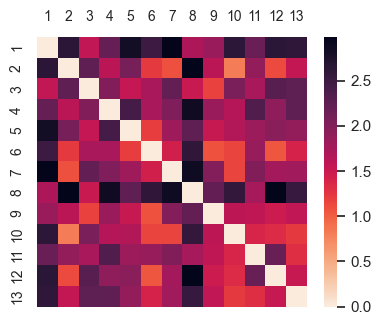

In [91]:
#faithfulness inter-subject agreement
fid_norm = pd.read_csv("fid_norm.csv",sep=";")
f, ax = plt.subplots(figsize=(4.35, 3.5))
sns.set_theme(style="ticks")
cols = fid_norm.columns[1:]
mat = np.zeros(shape=[13,13])
for v in range(len(cols)):
    for w in range(len(cols)):
        mat[v][w] = np.linalg.norm(fid_norm[cols[v]]-fid_norm[cols[w]])
sns.heatmap(data=mat, cmap=sns.color_palette("rocket_r", as_cmap=True))
acc_mat = mat.sum(axis=1)
acc_mat
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, left=False, top = False, labeltop=True)

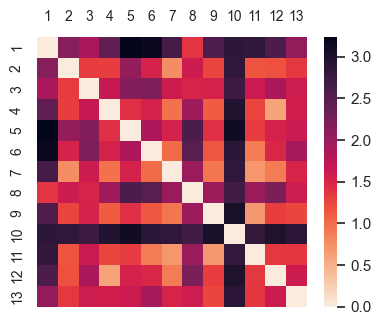

In [89]:
#aesthetics inter-subject agreement
est_norm = pd.read_csv("est_norm.csv",sep=";")
f, ax = plt.subplots(figsize=(4.35, 3.5))
sns.set_theme(style="ticks")
# 
cols = est_norm.columns[1:]
mat = np.zeros(shape=[13,13])
for v in range(len(cols)):
    for w in range(len(cols)):
        mat[v][w] = np.linalg.norm(est_norm[cols[v]]-est_norm[cols[w]])
sns.heatmap(data=mat, cmap=sns.color_palette("rocket_r", as_cmap=True))
acc_mat = mat.sum(axis=1)
acc_mat
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, left=False, top = False, labeltop=True)

C:\Users\Nero\AppData\Local\Temp\ipykernel_10992\4034766347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(fid_dev['rank_dif'], palette=pallete, saturation=1, linewidth=2, edgecolor="black")


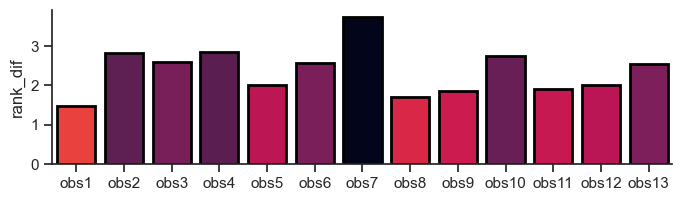

In [82]:
fid_dev = pd.read_csv("fid_dev.csv",sep=";")
fid_dev = fid_dev.T
fid_dev.columns = fid_dev.iloc[0]
fid_dev = fid_dev[1:]
f, ax = plt.subplots(figsize=(8, 2))
cm = sns.color_palette("rocket_r", as_cmap=True)
max = np.max(fid_dev['rank_dif'])
pallete = [cm(v/max) for v in fid_dev['rank_dif']]
sns.barplot(fid_dev['rank_dif'], palette=pallete, saturation=1, linewidth=2, edgecolor="black")
sns.despine()

C:\Users\Nero\AppData\Local\Temp\ipykernel_10992\706761143.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(est_dev['rank_dif'], palette=pallete, saturation=1, linewidth=2, edgecolor="black")


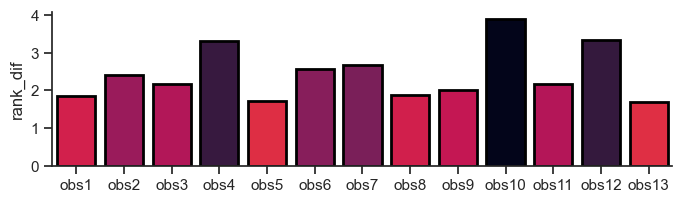

In [80]:
est_dev = pd.read_csv("est_dev.csv",sep=";")
est_dev = est_dev.T
est_dev.columns = est_dev.iloc[0]
est_dev = est_dev[1:]
f, ax = plt.subplots(figsize=(8, 2))
cm = sns.color_palette("rocket_r", as_cmap=True)
max = np.max(est_dev['rank_dif'])
pallete = [cm(v/max) for v in est_dev['rank_dif']]
sns.barplot(est_dev['rank_dif'], palette=pallete, saturation=1, linewidth=2, edgecolor="black")
sns.despine()

In [72]:
cm = sns.color_palette("rocket", as_cmap=True)
for i in range(10):
    print(cm(i/10))
max = np.max(est_dev['rank_dif'])
pallete = [cm(v/max) for v in est_dev['rank_dif']]

(0.01060815, 0.01808215, 0.10018654, 1.0)
(0.14633406, 0.07973393, 0.1986151, 1.0)
(0.29977678, 0.11356089, 0.29254823, 1.0)
(0.45809049, 0.12142996, 0.34540024, 1.0)
(0.63139686, 0.10067417, 0.35664819, 1.0)
(0.7965014, 0.10506637, 0.31063031, 1.0)
(0.90848638, 0.24568473, 0.24598324, 1.0)
(0.95165009, 0.44224144, 0.30214494, 1.0)
(0.96298491, 0.6126247, 0.45145074, 1.0)
(0.96739773, 0.77451297, 0.65057302, 1.0)


C:\Users\Nero\AppData\Local\Temp\ipykernel_10992\3655275979.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = corr.copy().applymap(significance_pearson)


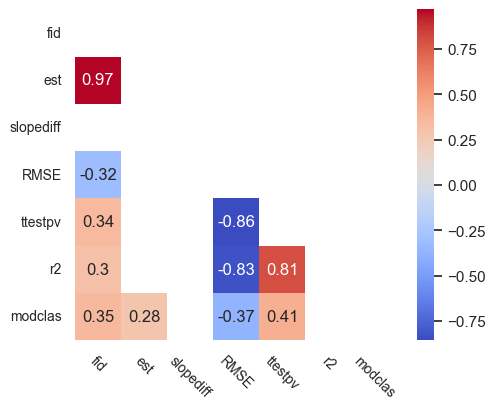

In [110]:
#pearson correlations test
summary = pd.read_csv("summary.csv",sep=";")
summary = summary.drop(summary.columns[0], axis=1)

f, ax = plt.subplots(figsize=(5.2, 4.3))

#constants
N=13*4 #number of samples: we have 4scenes*13subjects = 52 datapoints
STEST = 2/np.sqrt(N)

def significance_pearson(val):
    if np.abs(val)<STEST:
        return True
    return False

corr = summary.corr(method='pearson')

#prepare masks
mask = corr.copy().applymap(significance_pearson)
mask2 = np.triu(np.ones_like(corr, dtype=bool)) #remove upper triangle
mask_comb = np.logical_or(mask, mask2)

c = sns.heatmap(corr, annot=True, mask=mask_comb, cmap=sns.color_palette("coolwarm", as_cmap=True))
c.set_xticklabels(c.get_xticklabels(), rotation=-45)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=False, left=False, top = False, labeltop=False)
plt.show()


C:\Users\Nero\AppData\Local\Temp\ipykernel_10992\278007237.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = corr.copy().applymap(significance_spearman)


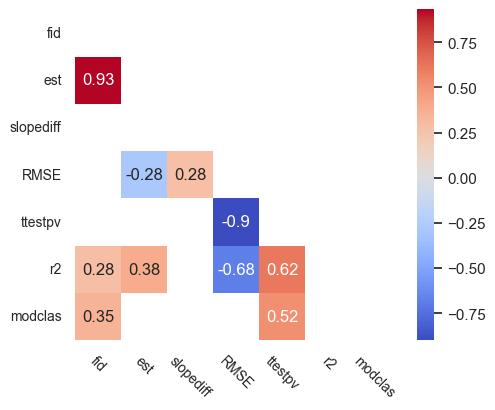

In [109]:
#spearmans correlations test
summary = pd.read_csv("summary.csv",sep=";")
summary = summary.drop(summary.columns[0], axis=1)

f, ax = plt.subplots(figsize=(5.2, 4.3))

#constants
N=13*4 #number of samples
TTEST = 1.96

def significance_spearman(val):
    if val==1:
        return True
    t = val * np.sqrt((N-2)/(1-val*val))    
    if np.abs(t)<1.96:
        return True
    return False


corr = summary.corr(method='spearman')

#prepare masks
mask = corr.copy().applymap(significance_spearman)
mask2 = np.triu(np.ones_like(corr, dtype=bool)) #remove upper triangle
mask_comb = np.logical_or(mask, mask2)

c = sns.heatmap(corr, annot=True, mask=mask_comb, cmap=sns.color_palette("coolwarm", as_cmap=True))
c.set_xticklabels(c.get_xticklabels(), rotation=-45)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=False, left=False, top = False, labeltop=False)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]
[28.69476576, 33.05352412, 40.11428904, 46.49859277, 55.27775036, 63.73763114, 74.13216441, 85.12886501, 28.94599617, 33.42691177, 40.41015192, 46.4052116, 54.93818035, 63.66391372, 73.92674889, 84.90962856, 26.45660732, 30.56135491, 37.58454838, 48.13378784, 56.45635773, 64.61180394, 74.52751394, 85.27618712, 28.01241721, 32.93430913, 40.11428904, 46.51191018, 54.1752327, 63.5982724, 74.43218161, 83.36866338, 28.64522365, 33.19797123, 40.11428904, 46.57841226, 54.85536903, 63.15233434, 74.34302307, 84.49404119, 26.80871095, 31.24951827, 38.19901325, 45.31755383, 53.62147485, 61.46393487, 71.35087926, 84.49404119, 26.8030319, 31.95216494, 38.65566936, 46.0423824, 52.79593179, 62.14294995, 71.18691665, 82.50223296]


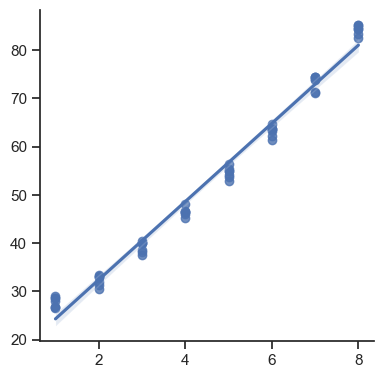

In [122]:
corrected_grays = pd.read_csv("corrected_grays.csv",sep=";")
corrected_grays = corrected_grays.drop(corrected_grays.columns[0], axis=1)
x = []
y = []
f, ax = plt.subplots(figsize=(4.3, 4.3))
for i in range(7):
    for j in range(8):
        x.append(j+1)
        y.append(corrected_grays["L*"+str(i+1)][j])
sns.regplot(x=x, y=y)
print(x)
print(y)
sns.despine()